# UNSW-NB15: Modelo de Aprendizagem Profunda

In [1]:
file_path = "./dataPronta"

## Carregamento das bibliotecas

In [2]:
import pickle
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings("ignore")

## Carregamento dos datasets

In [3]:
# Dados Treino e Teste

x_train, y_train = pickle.load(open(file_path+'/final_train.pkl', 'rb'))
x_test, y_test = pickle.load(open(file_path+'/final_test.pkl', 'rb'))

x_train.shape, y_train.shape, x_test.shape, y_test.shape

((228664, 175), (228664,), (80650, 175), (80650,))

In [4]:
# Criação do conjunto de validação a partir de metade do conjunto de teste

x_test, x_validation, y_test, y_validation = train_test_split(x_test, y_test, test_size=0.5, random_state=1)

x_train.shape, y_train.shape, x_test.shape, y_test.shape, x_validation.shape, y_validation.shape

((228664, 175), (228664,), (40325, 175), (40325,), (40325, 175), (40325,))

Com redes neurais, não é necessário ajustar manualmente os tipos de dados ou atribuir pesos diferentes a colunas individuais com base na sua relevância. O modelo aprenderá automaticamente os pesos apropriados durante o treino.

As redes neurais são capazes de aprender relações complexos entre recursos e as suas variáveis alvo correspondentes. Os pesos do modelo são ajustados iterativamente através do processo de treino para minimizar a função de loss, que mede a discrepância entre as saídas previstas e os rótulos verdadeiros. Este processo de otimização tem como objetivo encontrar o conjunto ideal de pesos que melhor representam os padrões e relacionamentos nos dados.

Durante o treino, o modelo ajusta os pesos para atribuir diferentes níveis de importância a cada recurso com base na sua contribuição para a tarefa de previsão. O algoritmo de aprendizagem leva em consideração os gradientes da função de loss em relação aos pesos e atualiza os pesos de acordo. Este processo permite que o modelo aprenda automaticamente quais os recursos são mais relevantes para fazer previsões precisas.

--------------------------------------------------------------------------------------------------------------------------

## FFNN

Epoch 1/100
894/894 - 2s - loss: 0.7339 - accuracy: 0.7543 - val_loss: 0.8111 - val_accuracy: 0.6220 - 2s/epoch - 2ms/step
Epoch 2/100
894/894 - 1s - loss: 0.4586 - accuracy: 0.8090 - val_loss: 0.6238 - val_accuracy: 0.7353 - 859ms/epoch - 960us/step
Epoch 3/100
894/894 - 1s - loss: 0.4227 - accuracy: 0.8200 - val_loss: 0.5082 - val_accuracy: 0.8200 - 869ms/epoch - 972us/step
Epoch 4/100
894/894 - 1s - loss: 0.3994 - accuracy: 0.8277 - val_loss: 0.5389 - val_accuracy: 0.7364 - 862ms/epoch - 965us/step
Epoch 5/100
894/894 - 1s - loss: 0.3870 - accuracy: 0.8313 - val_loss: 0.5338 - val_accuracy: 0.8050 - 871ms/epoch - 974us/step
Epoch 6/100
894/894 - 1s - loss: 0.3814 - accuracy: 0.8348 - val_loss: 0.4555 - val_accuracy: 0.8229 - 869ms/epoch - 972us/step
Epoch 7/100
894/894 - 1s - loss: 0.3754 - accuracy: 0.8373 - val_loss: 0.4863 - val_accuracy: 0.8093 - 875ms/epoch - 979us/step
Epoch 8/100
894/894 - 1s - loss: 0.3726 - accuracy: 0.8375 - val_loss: 0.4915 - val_accuracy: 0.7908 - 874ms/

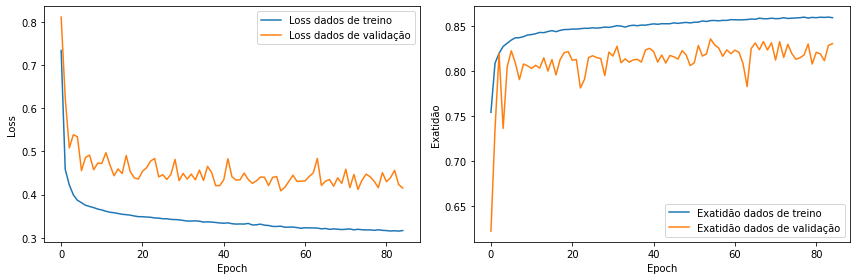

1261/1261 [==============================] - 1s 495us/step
MÉTRICAS NOS DADOS DE TESTE: 


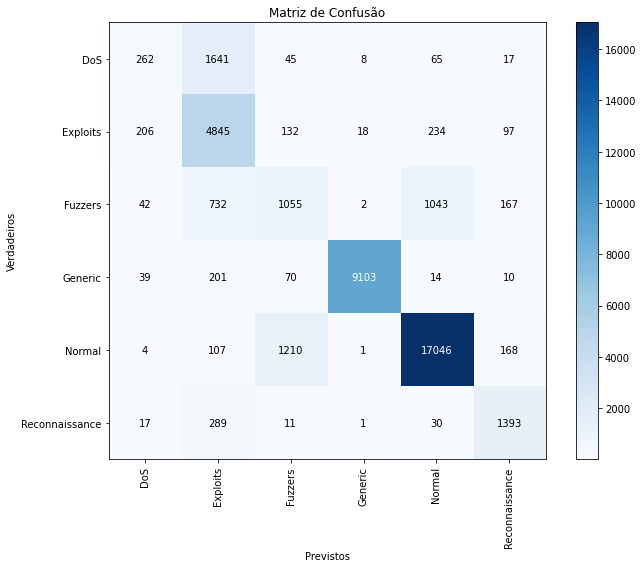

╒══════════════════╤════════════╤════════════════╤════════════╤═════════════╕
│ Tipo de Ataque   │   Precisão │   Recall / TPR │   F1-score │         FPR │
╞══════════════════╪════════════╪════════════════╪════════════╪═════════════╡
│ DoS              │   0.459649 │       0.128557 │   0.20092  │ 0.00804451  │
├──────────────────┼────────────┼────────────────┼────────────┼─────────────┤
│ Exploits         │   0.619962 │       0.875813 │   0.726006 │ 0.085362    │
├──────────────────┼────────────┼────────────────┼────────────┼─────────────┤
│ Fuzzers          │   0.418153 │       0.346925 │   0.379224 │ 0.0393735   │
├──────────────────┼────────────┼────────────────┼────────────┼─────────────┤
│ Generic          │   0.996715 │       0.964607 │   0.980398 │ 0.000971251 │
├──────────────────┼────────────┼────────────────┼────────────┼─────────────┤
│ Normal           │   0.924805 │       0.919616 │   0.922203 │ 0.0636101   │
├──────────────────┼────────────┼────────────────┼────────────┼─

In [5]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import metrics
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.utils import to_categorical
from sklearn.preprocessing import LabelEncoder
from tabulate import tabulate
import copy

# Cópia profunda das variáveis: Constrói um novo objeto composto e então, recursivamente, insere nele cópias dos objetos encontrados no original. Fornece uma cópia completamente independente.
x_train_network = copy.deepcopy(x_train)
y_train_network = copy.deepcopy(y_train)
x_validation_network = copy.deepcopy(x_validation)
y_validation_network = copy.deepcopy(y_validation)
x_test_network = copy.deepcopy(x_test)
y_test_network = copy.deepcopy(y_test)

# Transformação das colunas alvo em numeros

# Vamos primeiro guardar
y_train_labels = copy.deepcopy(y_train_network)
y_validation_labels = copy.deepcopy(y_validation_network)
y_test_labels = copy.deepcopy(y_test_network)

# Criação do objeto codificador da coluna
label_encoder = LabelEncoder()

# Codificação
y_train_network_encoded = label_encoder.fit_transform(y_train_network.astype(str))
y_validation_network_encoded = label_encoder.transform(y_validation_network)
y_test_network_encoded = label_encoder.transform(y_test_network)

# Como estamos a usar categorical_crossentropy como a função loss e softmax como a função de ativação na camada de saída, precisamos de codificar a variavel alvo com one-hot encoding.
y_train_network = to_categorical(y_train_network_encoded)
y_validation_network = to_categorical(y_validation_network_encoded)
y_test_network = to_categorical(y_test_network_encoded)

# Definir o modelo

# Cria uma nova instância de um modelo sequencial. O modelo sequencial é uma pilha linear de camadas.
# As camadas densas representam uma camada totalmente conectada numa rede neural. A primeira possui 64 neurônios e utiliza a função de ativação ReLU. 
# O parâmetro input_dim é definido como o número de colunas nos dados x_train_ffnn.
# As camadas densas possuem 70, 60 e 30 nós e ativação ReLU.
# A camada densa final é adicionada ao modelo. O número de neurónios nesta camada é determinado pelo número de classes nos dados y_train_dnn (número de ataques). 
# A função de ativação utilizada é softmax, que converte a saída de cada nó entre 0 e 1, representando a probabilidade prevista de pertencer a cada classe.
model_ffnn = Sequential()
model_ffnn.add(Dense(70, input_dim=x_train_network.shape[1], activation='relu'))
model_ffnn.add(Dense(60, activation='relu'))
model_ffnn.add(Dense(30, activation='relu'))
model_ffnn.add(Dense(y_train_network.shape[1], activation='softmax'))

# Compilar o modelo

# Esta linha compila o modelo. O otimizador é definido como 'adam', que é um algoritmo de otimização eficiente usado em aprendizagem profunda. 
# A função de perda é definida como 'categorical_crossentropy', que é adequada para problemas de classificação categóricos, como é o caso. 
# O parâmetro metrics especifica que o modelo deve calcular e relatar a exatidão durante o treino.
model_ffnn.compile(optimizer='adam',
                   loss='categorical_crossentropy',       
                   metrics=['accuracy'])

# Treinar o modelo

# Esta linha treina o modelo usando os dados de treino (x_train_ffnn e y_train_ffnn). 
# O parâmetro epochs determina o número de vezes que os dados de treino são passados pelo modelo. 
# O parâmetro batch_size especifica o número de amostras por atualização de gradiente. 
# O parâmetro validation_data fornece os dados de validação para avaliar o desempenho do modelo em dados que ele não viu durante o treino. 
# O parâmetro callbacks permite especificar funções adicionais a serem chamadas durante o treino, como a paragem antecipada
# (técnica usada durante o treino do modelo para evitar o overfitting e encontrar o ponto ideal onde o desempenho do modelo num conjunto de dados de validação começa a ser exagerado).
# O parâmetro de patience é definido como 30, o que significa que se a perda de validação não melhorar em 30 épocas consecutivas, o treino será interrompido antecipadamente.
# O parâmetro verbose determina o nível de detalhe da saída de treino.

monitor = EarlyStopping(monitor='val_loss', min_delta=1e-3, 
                        patience=5, verbose=1, mode='auto',
                        restore_best_weights=True)


history = model_ffnn.fit(x_train_network, y_train_network,
                         epochs=100,
                         batch_size=256,
                         validation_data=(x_validation_network, y_validation_network),
                         callbacks=[EarlyStopping(monitor='val_loss', patience=30, restore_best_weights=True)],
                         verbose=2)

# Gráfico dos valores de loss nas várias épocas durante o treino, para os dados de treino e validação
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Loss dados de treino')
plt.plot(history.history['val_loss'], label='Loss dados de validação')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
# Gráfico dos valores de exatidão nas várias épocas durante o treino, para os dados de treino e validação
plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Exatidão dados de treino')
plt.plot(history.history['val_accuracy'], label='Exatidão dados de validação')
plt.xlabel('Epoch')
plt.ylabel('Exatidão')
plt.legend()
plt.tight_layout()
plt.show()

# Avaliar o modelo com dados de teste
y_pred = model_ffnn.predict(x_test_network)

# Cálculo das métricas
print('MÉTRICAS NOS DADOS DE TESTE: ')

auc_score = metrics.roc_auc_score(y_test_network, y_pred, multi_class='ovr')
f1_score = metrics.f1_score(y_test_network.argmax(axis=1), y_pred.argmax(axis=1), average='weighted')
accuracy = metrics.accuracy_score(y_test_network.argmax(axis=1), y_pred.argmax(axis=1))
cm = metrics.confusion_matrix(y_test_network.argmax(axis=1), y_pred.argmax(axis=1))

# Gráfico da matriz de confusão

# Obtém os nomes das categorias originais
attack_categories = label_encoder.inverse_transform(range(len(label_encoder.classes_)))
# Define o tamanho da figura
plt.figure(figsize=(10, 8))
# Gráfico da matriz de confusão
plt.imshow(cm, cmap='Blues')
plt.colorbar()
tick_marks = np.arange(len(label_encoder.classes_))
plt.xticks(tick_marks, attack_categories, rotation=90)
plt.yticks(tick_marks, attack_categories)
plt.xlabel('Previstos')
plt.ylabel('Verdadeiros')
plt.title('Matriz de Confusão')
# Adiciona as anotações dos valores na matriz de confusão
thresh = cm.max() / 2.
for i in range(cm.shape[0]):
    for j in range(cm.shape[1]):
        plt.text(j, i, format(cm[i, j], 'd'),
                 ha="center", va="center",
                 color="white" if cm[i, j] > thresh else "black")
plt.tight_layout()
plt.show()

# Tabela das métricas
# Cálculo da FPR (False Positive Rate) para cada tipo de ataque
fpr_scores = []
for i in range(len(cm)):
    tn, fp, fn, tp = metrics.confusion_matrix((y_test_network.argmax(axis=1) == i).astype(int), (y_pred.argmax(axis=1) == i).astype(int)).ravel()
    fpr = fp / (fp + tn)
    fpr_scores.append(fpr)
# Tabela das métricas
# Cálculo do classification report
classification_rep = metrics.classification_report(y_test_network.argmax(axis=1), y_pred.argmax(axis=1), output_dict=True)
# Extrair as métricas e o suporte do classification report
metrics_data = []
attack_mapping = dict(zip(range(len(attack_categories)), attack_categories))
for label, metrics_dict in classification_rep.items():
    if label.isdigit(): 
        metrics_list = [attack_mapping[int(label)]]
        metrics_list.extend([metrics_dict[key] for key in ('precision', 'recall', 'f1-score')])
        metrics_list.append(fpr_scores[int(label)])  # Adicionar a taxa de falsos positivos (FPR) calculada acima
        metrics_data.append(metrics_list)
# Definir os cabeçalhos da tabela
headers = ['Tipo de Ataque', 'Precisão', 'Recall / TPR', 'F1-score', 'FPR']
# Imprimir a tabela formatada
print(tabulate(metrics_data, headers=headers, tablefmt='fancy_grid'))

print('Métricas globias dos dados de teste: ')
# Impressão das métricas
print('AUC score:', auc_score)
print('Exatidão:', accuracy)


In [7]:
# Mapeamento entre os números e os tipos de ataque
mapping = dict(zip(range(len(label_encoder.classes_)), label_encoder.classes_))

# Mapeamento
for number, attack_type in mapping.items():
    print(f"Número: {number}  - Tipo de Ataque: {attack_type}")

Número: 0  - Tipo de Ataque: DoS
Número: 1  - Tipo de Ataque: Exploits
Número: 2  - Tipo de Ataque: Fuzzers
Número: 3  - Tipo de Ataque: Generic
Número: 4  - Tipo de Ataque: Normal
Número: 5  - Tipo de Ataque: Reconnaissance


## DNN

Epoch 1/100
894/894 - 4s - loss: 0.5698 - accuracy: 0.7713 - val_loss: 0.6325 - val_accuracy: 0.7708 - 4s/epoch - 5ms/step
Epoch 2/100
894/894 - 3s - loss: 0.4271 - accuracy: 0.8160 - val_loss: 0.4913 - val_accuracy: 0.8154 - 3s/epoch - 4ms/step
Epoch 3/100
894/894 - 3s - loss: 0.4043 - accuracy: 0.8239 - val_loss: 0.5620 - val_accuracy: 0.7743 - 3s/epoch - 4ms/step
Epoch 4/100
894/894 - 3s - loss: 0.4002 - accuracy: 0.8263 - val_loss: 0.4995 - val_accuracy: 0.7989 - 3s/epoch - 4ms/step
Epoch 5/100
894/894 - 3s - loss: 0.3870 - accuracy: 0.8314 - val_loss: 0.4952 - val_accuracy: 0.7795 - 3s/epoch - 4ms/step
Epoch 6/100
894/894 - 3s - loss: 0.3749 - accuracy: 0.8358 - val_loss: 0.5206 - val_accuracy: 0.7861 - 3s/epoch - 4ms/step
Epoch 7/100
894/894 - 3s - loss: 0.3778 - accuracy: 0.8354 - val_loss: 0.5035 - val_accuracy: 0.7908 - 3s/epoch - 4ms/step
Epoch 8/100
894/894 - 3s - loss: 0.3686 - accuracy: 0.8383 - val_loss: 0.4777 - val_accuracy: 0.8176 - 3s/epoch - 4ms/step
Epoch 9/100
894/

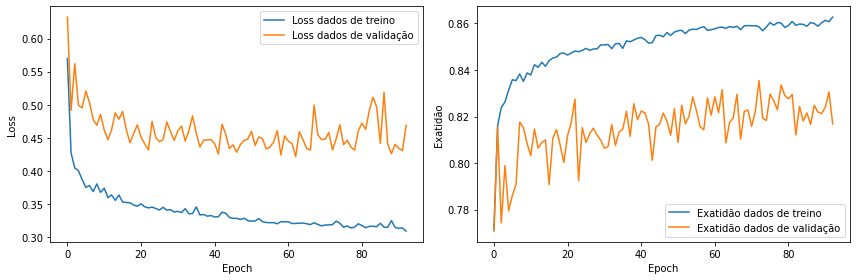

1261/1261 [==============================] - 1s 846us/step
MÉTRICAS NOS DADOS DE TESTE: 


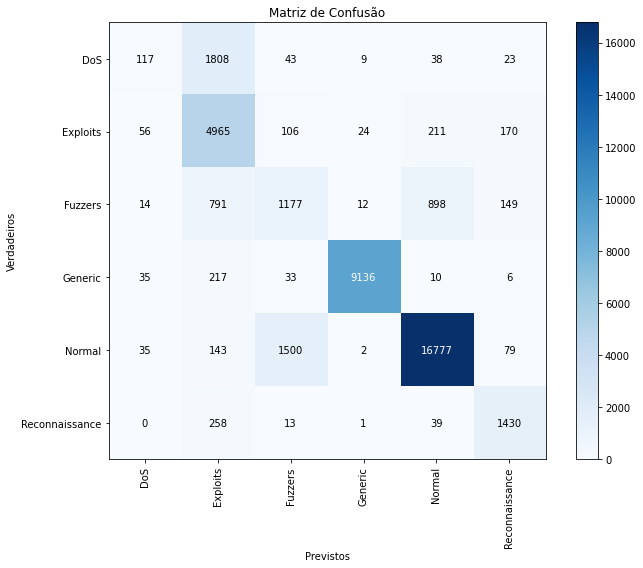

╒══════════════════╤════════════╤════════════════╤════════════╤════════════╕
│ Tipo de Ataque   │   Precisão │   Recall / TPR │   F1-score │        FPR │
╞══════════════════╪════════════╪════════════════╪════════════╪════════════╡
│ DoS              │   0.455253 │      0.0574092 │   0.101961 │ 0.00365659 │
├──────────────────┼────────────┼────────────────┼────────────┼────────────┤
│ Exploits         │   0.60682  │      0.897505  │   0.724078 │ 0.0924611  │
├──────────────────┼────────────┼────────────────┼────────────┼────────────┤
│ Fuzzers          │   0.409819 │      0.387044  │   0.398106 │ 0.0454619  │
├──────────────────┼────────────┼────────────────┼────────────┼────────────┤
│ Generic          │   0.994774 │      0.968104  │   0.981258 │ 0.001554   │
├──────────────────┼────────────┼────────────────┼────────────┼────────────┤
│ Normal           │   0.933456 │      0.905104  │   0.919061 │ 0.0548901  │
├──────────────────┼────────────┼────────────────┼────────────┼────────────┤

In [8]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import metrics
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.utils import to_categorical
from sklearn.preprocessing import LabelEncoder
from tabulate import tabulate
import copy

# Cópia profunda das variáveis: Constrói um novo objeto composto e então, recursivamente, insere nele cópias dos objetos encontrados no original. Fornece uma cópia completamente independente.
x_train_network = copy.deepcopy(x_train)
y_train_network = copy.deepcopy(y_train)
x_validation_network = copy.deepcopy(x_validation)
y_validation_network = copy.deepcopy(y_validation)
x_test_network = copy.deepcopy(x_test)
y_test_network = copy.deepcopy(y_test)

# Transformação das colunas alvo em numeros

# Vamos primeiro guardar
y_train_labels = copy.deepcopy(y_train_network)
y_validation_labels = copy.deepcopy(y_validation_network)
y_test_labels = copy.deepcopy(y_test_network)

# Criação do objeto codificador da coluna
label_encoder = LabelEncoder()

# Codificação
y_train_network_encoded = label_encoder.fit_transform(y_train_network.astype(str))
y_validation_network_encoded = label_encoder.transform(y_validation_network)
y_test_network_encoded = label_encoder.transform(y_test_network)

# Como estamos a usar categorical_crossentropy como a função loss e softmax como a função de ativação na camada de saída, precisamos de codificar a variavel alvo com one-hot encoding.
y_train_network = to_categorical(y_train_network_encoded)
y_validation_network = to_categorical(y_validation_network_encoded)
y_test_network = to_categorical(y_test_network_encoded)

# Definir o modelo

# Cria uma nova instância de um modelo sequencial. O modelo sequencial é uma pilha linear de camadas.
# As camadas densas representam uma camada totalmente conectada numa rede neural. A primeira possui 64 neurônios e utiliza a função de ativação ReLU. 
# O parâmetro input_dim é definido como o número de colunas nos dados x_train_ffnn.
# As camadas densas possuem 70, 60, 30, 256, 384, 384, 256, 128, 64 nós e ativação ReLU.
# A camada densa final é adicionada ao modelo. O número de neurónios nesta camada é determinado pelo número de classes nos dados y_train_dnn (número de ataques). 
# A função de ativação utilizada é softmax, que converte a saída de cada nó entre 0 e 1, representando a probabilidade prevista de pertencer a cada classe.
model_ffnn = Sequential()
model_ffnn.add(Dense(70, input_dim=x_train_network.shape[1], activation='relu'))
model_ffnn.add(Dense(60, activation='relu'))
model_ffnn.add(Dense(30, activation='relu'))
model_ffnn.add(Dense(256, activation='relu'))
model_ffnn.add(Dense(384, activation='relu'))
model_ffnn.add(Dense(384, activation='relu'))
model_ffnn.add(Dense(256, activation='relu'))
model_ffnn.add(Dense(128, activation='relu'))
model_ffnn.add(Dense(64, activation='relu'))
model_ffnn.add(Dense(y_train_network.shape[1], activation='softmax'))

# Compilar o modelo

# Esta linha compila o modelo. O otimizador é definido como 'adam', que é um algoritmo de otimização eficiente usado em aprendizagem profunda. 
# A função de perda é definida como 'categorical_crossentropy', que é adequada para problemas de classificação categóricos, como é o caso. 
# O parâmetro metrics especifica que o modelo deve calcular e relatar a exatidão durante o treino.
model_ffnn.compile(optimizer='adam',
                   loss='categorical_crossentropy',       
                   metrics=['accuracy'])

# Treinar o modelo

# Esta linha treina o modelo usando os dados de treino (x_train_ffnn e y_train_ffnn). 
# O parâmetro epochs determina o número de vezes que os dados de treino são passados pelo modelo. 
# O parâmetro batch_size especifica o número de amostras por atualização de gradiente. 
# O parâmetro validation_data fornece os dados de validação para avaliar o desempenho do modelo em dados que ele não viu durante o treino. 
# O parâmetro callbacks permite especificar funções adicionais a serem chamadas durante o treino, como a paragem antecipada
# (técnica usada durante o treino do modelo para evitar o overfitting e encontrar o ponto ideal onde o desempenho do modelo num conjunto de dados de validação começa a ser exagerado).
# O parâmetro de patience é definido como 30, o que significa que se a perda de validação não melhorar em 30 épocas consecutivas, o treino será interrompido antecipadamente.
# O parâmetro verbose determina o nível de detalhe da saída de treino.

monitor = EarlyStopping(monitor='val_loss', min_delta=1e-3, 
                        patience=5, verbose=1, mode='auto',
                        restore_best_weights=True)


history = model_ffnn.fit(x_train_network, y_train_network,
                         epochs=100,
                         batch_size=256,
                         validation_data=(x_validation_network, y_validation_network),
                         callbacks=[EarlyStopping(monitor='val_loss', patience=30, restore_best_weights=True)],
                         verbose=2)

# Gráfico dos valores de loss nas várias épocas durante o treino, para os dados de treino e validação
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Loss dados de treino')
plt.plot(history.history['val_loss'], label='Loss dados de validação')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
# Gráfico dos valores de exatidão nas várias épocas durante o treino, para os dados de treino e validação
plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Exatidão dados de treino')
plt.plot(history.history['val_accuracy'], label='Exatidão dados de validação')
plt.xlabel('Epoch')
plt.ylabel('Exatidão')
plt.legend()
plt.tight_layout()
plt.show()

# Avaliar o modelo com dados de teste
y_pred = model_ffnn.predict(x_test_network)

# Cálculo das métricas
print('MÉTRICAS NOS DADOS DE TESTE: ')

auc_score = metrics.roc_auc_score(y_test_network, y_pred, multi_class='ovr')
f1_score = metrics.f1_score(y_test_network.argmax(axis=1), y_pred.argmax(axis=1), average='weighted')
accuracy = metrics.accuracy_score(y_test_network.argmax(axis=1), y_pred.argmax(axis=1))
cm = metrics.confusion_matrix(y_test_network.argmax(axis=1), y_pred.argmax(axis=1))

# Gráfico da matriz de confusão

# Obtém os nomes das categorias originais
attack_categories = label_encoder.inverse_transform(range(len(label_encoder.classes_)))
# Define o tamanho da figura
plt.figure(figsize=(10, 8))
# Gráfico da matriz de confusão
plt.imshow(cm, cmap='Blues')
plt.colorbar()
tick_marks = np.arange(len(label_encoder.classes_))
plt.xticks(tick_marks, attack_categories, rotation=90)
plt.yticks(tick_marks, attack_categories)
plt.xlabel('Previstos')
plt.ylabel('Verdadeiros')
plt.title('Matriz de Confusão')
# Adiciona as anotações dos valores na matriz de confusão
thresh = cm.max() / 2.
for i in range(cm.shape[0]):
    for j in range(cm.shape[1]):
        plt.text(j, i, format(cm[i, j], 'd'),
                 ha="center", va="center",
                 color="white" if cm[i, j] > thresh else "black")
plt.tight_layout()
plt.show()

# Tabela das métricas
# Cálculo da FPR (False Positive Rate) para cada tipo de ataque
fpr_scores = []
for i in range(len(cm)):
    tn, fp, fn, tp = metrics.confusion_matrix((y_test_network.argmax(axis=1) == i).astype(int), (y_pred.argmax(axis=1) == i).astype(int)).ravel()
    fpr = fp / (fp + tn)
    fpr_scores.append(fpr)
# Tabela das métricas
# Cálculo do classification report
classification_rep = metrics.classification_report(y_test_network.argmax(axis=1), y_pred.argmax(axis=1), output_dict=True)
# Extrair as métricas e o suporte do classification report
metrics_data = []
attack_mapping = dict(zip(range(len(attack_categories)), attack_categories))
for label, metrics_dict in classification_rep.items():
    if label.isdigit(): 
        metrics_list = [attack_mapping[int(label)]]
        metrics_list.extend([metrics_dict[key] for key in ('precision', 'recall', 'f1-score')])
        metrics_list.append(fpr_scores[int(label)])  # Adicionar a taxa de falsos positivos (FPR) calculada acima
        metrics_data.append(metrics_list)
# Definir os cabeçalhos da tabela
headers = ['Tipo de Ataque', 'Precisão', 'Recall / TPR', 'F1-score', 'FPR']
# Imprimir a tabela formatada
print(tabulate(metrics_data, headers=headers, tablefmt='fancy_grid'))

print('Métricas globias dos dados de teste: ')
# Impressão das métricas
print('AUC score:', auc_score)
print('Exatidão:', accuracy)

## RNN

Epoch 1/100
894/894 - 409s - loss: 0.7469 - accuracy: 0.7243 - val_loss: 0.6268 - val_accuracy: 0.7731 - 409s/epoch - 457ms/step
Epoch 2/100
894/894 - 381s - loss: 0.4876 - accuracy: 0.7995 - val_loss: 0.5887 - val_accuracy: 0.7827 - 381s/epoch - 426ms/step
Epoch 3/100
894/894 - 382s - loss: 0.4481 - accuracy: 0.8119 - val_loss: 0.5692 - val_accuracy: 0.7773 - 382s/epoch - 427ms/step
Epoch 4/100
894/894 - 381s - loss: 0.4489 - accuracy: 0.8115 - val_loss: 0.5206 - val_accuracy: 0.8012 - 381s/epoch - 426ms/step
Epoch 5/100
894/894 - 386s - loss: 0.4182 - accuracy: 0.8215 - val_loss: 0.5143 - val_accuracy: 0.7964 - 386s/epoch - 431ms/step
Epoch 6/100
894/894 - 383s - loss: 0.4192 - accuracy: 0.8223 - val_loss: 0.5404 - val_accuracy: 0.7875 - 383s/epoch - 429ms/step
Epoch 7/100
894/894 - 391s - loss: 0.3925 - accuracy: 0.8316 - val_loss: 0.4798 - val_accuracy: 0.8149 - 391s/epoch - 438ms/step
Epoch 8/100
894/894 - 397s - loss: 0.3791 - accuracy: 0.8373 - val_loss: 0.5698 - val_accuracy: 0

1261/1261 [==============================] - 37s 29ms/step
MÉTRICAS NOS DADOS DE TESTE: 


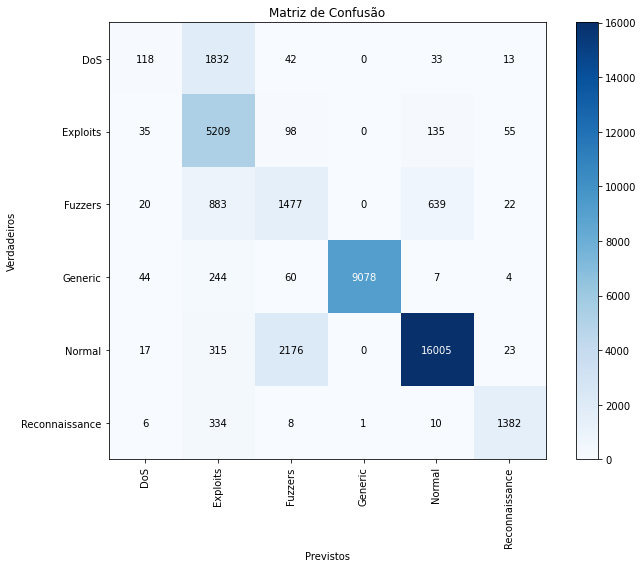

╒══════════════════╤════════════╤════════════════╤════════════╤════════════╕
│ Tipo de Ataque   │   Precisão │   Recall / TPR │   F1-score │        FPR │
╞══════════════════╪════════════╪════════════════╪════════════╪════════════╡
│ DoS              │   0.491667 │      0.0578999 │   0.1036   │ 0.00318646 │
├──────────────────┼────────────┼────────────────┼────────────┼────────────┤
│ Exploits         │   0.590791 │      0.941612  │   0.726044 │ 0.103699   │
├──────────────────┼────────────┼────────────────┼────────────┼────────────┤
│ Fuzzers          │   0.382543 │      0.485695  │   0.427992 │ 0.0639416  │
├──────────────────┼────────────┼────────────────┼────────────┼────────────┤
│ Generic          │   0.99989  │      0.961958  │   0.980557 │ 3.2375e-05 │
├──────────────────┼────────────┼────────────────┼────────────┼────────────┤
│ Normal           │   0.951037 │      0.863455  │   0.905132 │ 0.0378172  │
├──────────────────┼────────────┼────────────────┼────────────┼────────────┤

In [9]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import metrics
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, LSTM
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.utils import to_categorical
from sklearn.preprocessing import LabelEncoder
from tabulate import tabulate
import copy

# Cópia profunda das variáveis: Constrói um novo objeto composto e então, recursivamente, insere nele cópias dos objetos encontrados no original. Fornece uma cópia completamente independente.
x_train_network = copy.deepcopy(x_train)
y_train_network = copy.deepcopy(y_train)
x_validation_network = copy.deepcopy(x_validation)
y_validation_network = copy.deepcopy(y_validation)
x_test_network = copy.deepcopy(x_test)
y_test_network = copy.deepcopy(y_test)

# Transformação das colunas alvo em numeros

# Vamos primeiro guardar
y_train_labels = copy.deepcopy(y_train_network)
y_validation_labels = copy.deepcopy(y_validation_network)
y_test_labels = copy.deepcopy(y_test_network)

# Criação do objeto codificador da coluna
label_encoder = LabelEncoder()

# Codificação
y_train_network_encoded = label_encoder.fit_transform(y_train_network.astype(str))
y_validation_network_encoded = label_encoder.transform(y_validation_network)
y_test_network_encoded = label_encoder.transform(y_test_network)

# Como estamos a usar categorical_crossentropy como a função loss e softmax como a função de ativação na camada de saída, precisamos de codificar a variavel alvo com one-hot encoding.
y_train_network = to_categorical(y_train_network_encoded)
y_validation_network = to_categorical(y_validation_network_encoded)
y_test_network = to_categorical(y_test_network_encoded)

# Definir o modelo

# Cria uma nova instância de um modelo sequencial. O modelo sequencial é uma pilha linear de camadas.
# As camadas densas representam uma camada totalmente conectada numa rede neural. A primeira possui 64 neurônios e utiliza a função de ativação ReLU. 
# O parâmetro input_dim é definido como o número de colunas nos dados x_train_ffnn.
# O modelo possui duas camadas LSTM totalmente conectadas com possuem 70 e 60 nós respetivamente separadas por uma camada de dropout com taxa de dropout de 0,2.
# Dropout é uma técnica de regularização que define aleatoriamente uma porção das unidades de entrada como 0 durante o treino para evitar o overfitting. 
# Mais uma camada é adicionada, camada densa com 30 nós e utiliza a função de ativação ReLU. 
# A camada densa final é adicionada ao modelo. O número de neurónios nesta camada é determinado pelo número de classes nos dados y_train_dnn (número de ataques). 
# A função de ativação utilizada é softmax, que converte a saída de cada nó entre 0 e 1, representando a probabilidade prevista de pertencer a cada classe.
model_lstm = Sequential()
model_lstm.add(LSTM(units=70, input_shape=(x_train_network.shape[1],1), return_sequences=True))
model_lstm.add(Dropout(0.2))
model_lstm.add(LSTM(units=60))
model_lstm.add(Dense(units=30, activation='relu'))
model_lstm.add(Dense(units=y_train_network.shape[1], activation='softmax'))

# Compilar o modelo

# Esta linha compila o modelo. O otimizador é definido como 'adam', que é um algoritmo de otimização eficiente usado em aprendizagem profunda. 
# A função de perda é definida como 'categorical_crossentropy', que é adequada para problemas de classificação categóricos, como é o caso. 
# O parâmetro metrics especifica que o modelo deve calcular e relatar a exatidão durante o treino.
model_lstm.compile(optimizer='adam',
                   loss='categorical_crossentropy',       
                   metrics=['accuracy'])

# Treinar o modelo

# Esta linha treina o modelo usando os dados de treino (x_train_ffnn e y_train_ffnn). 
# O parâmetro epochs determina o número de vezes que os dados de treino são passados pelo modelo. 
# O parâmetro batch_size especifica o número de amostras por atualização de gradiente. 
# O parâmetro validation_data fornece os dados de validação para avaliar o desempenho do modelo em dados que ele não viu durante o treino. 
# O parâmetro callbacks permite especificar funções adicionais a serem chamadas durante o treino, como a paragem antecipada
# (técnica usada durante o treino do modelo para evitar o overfitting e encontrar o ponto ideal onde o desempenho do modelo num conjunto de dados de validação começa a ser exagerado).
# O parâmetro de patience é definido como 30, o que significa que se a perda de validação não melhorar em 30 épocas consecutivas, o treino será interrompido antecipadamente.
# O parâmetro verbose determina o nível de detalhe da saída de treino.

monitor = EarlyStopping(monitor='val_loss', min_delta=1e-3, 
                        patience=5, verbose=1, mode='auto',
                        restore_best_weights=True)


history = model_lstm.fit(x_train_network, y_train_network,
                         epochs=100,
                         batch_size=256,
                         validation_data=(x_validation_network, y_validation_network),
                         callbacks=[EarlyStopping(monitor='val_loss', patience=30, restore_best_weights=True)],
                         verbose=2)

# Gráfico dos valores de loss nas várias épocas durante o treino, para os dados de treino e validação
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Loss dados de treino')
plt.plot(history.history['val_loss'], label='Loss dados de validação')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
# Gráfico dos valores de exatidão nas várias épocas durante o treino, para os dados de treino e validação
plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Exatidão dados de treino')
plt.plot(history.history['val_accuracy'], label='Exatidão dados de validação')
plt.xlabel('Epoch')
plt.ylabel('Exatidão')
plt.legend()
plt.tight_layout()
plt.show()

# Avaliar o modelo com dados de teste
y_pred = model_lstm.predict(x_test_network)

# Cálculo das métricas
print('MÉTRICAS NOS DADOS DE TESTE: ')

auc_score = metrics.roc_auc_score(y_test_network, y_pred, multi_class='ovr')
f1_score = metrics.f1_score(y_test_network.argmax(axis=1), y_pred.argmax(axis=1), average='weighted')
accuracy = metrics.accuracy_score(y_test_network.argmax(axis=1), y_pred.argmax(axis=1))
cm = metrics.confusion_matrix(y_test_network.argmax(axis=1), y_pred.argmax(axis=1))

# Gráfico da matriz de confusão

# Obtém os nomes das categorias originais
attack_categories = label_encoder.inverse_transform(range(len(label_encoder.classes_)))
# Define o tamanho da figura
plt.figure(figsize=(10, 8))
# Gráfico da matriz de confusão
plt.imshow(cm, cmap='Blues')
plt.colorbar()
tick_marks = np.arange(len(label_encoder.classes_))
plt.xticks(tick_marks, attack_categories, rotation=90)
plt.yticks(tick_marks, attack_categories)
plt.xlabel('Previstos')
plt.ylabel('Verdadeiros')
plt.title('Matriz de Confusão')
# Adiciona as anotações dos valores na matriz de confusão
thresh = cm.max() / 2.
for i in range(cm.shape[0]):
    for j in range(cm.shape[1]):
        plt.text(j, i, format(cm[i, j], 'd'),
                 ha="center", va="center",
                 color="white" if cm[i, j] > thresh else "black")
plt.tight_layout()
plt.show()

# Tabela das métricas
# Cálculo da FPR (False Positive Rate) para cada tipo de ataque
fpr_scores = []
for i in range(len(cm)):
    tn, fp, fn, tp = metrics.confusion_matrix((y_test_network.argmax(axis=1) == i).astype(int), (y_pred.argmax(axis=1) == i).astype(int)).ravel()
    fpr = fp / (fp + tn)
    fpr_scores.append(fpr)
# Tabela das métricas
# Cálculo do classification report
classification_rep = metrics.classification_report(y_test_network.argmax(axis=1), y_pred.argmax(axis=1), output_dict=True)
# Extrair as métricas e o suporte do classification report
metrics_data = []
attack_mapping = dict(zip(range(len(attack_categories)), attack_categories))
for label, metrics_dict in classification_rep.items():
    if label.isdigit(): 
        metrics_list = [attack_mapping[int(label)]]
        metrics_list.extend([metrics_dict[key] for key in ('precision', 'recall', 'f1-score')])
        metrics_list.append(fpr_scores[int(label)])  # Adicionar a taxa de falsos positivos (FPR) calculada acima
        metrics_data.append(metrics_list)
# Definir os cabeçalhos da tabela
headers = ['Tipo de Ataque', 'Precisão', 'Recall / TPR', 'F1-score', 'FPR']
# Imprimir a tabela formatada
print(tabulate(metrics_data, headers=headers, tablefmt='fancy_grid'))

print('Métricas globias dos dados de teste: ')
# Impressão das métricas
print('AUC score:', auc_score)
print('Exatidão:', accuracy)

## CNN - LSTM

Epoch 1/100
894/894 - 131s - loss: 0.6591 - accuracy: 0.7494 - val_loss: 0.5672 - val_accuracy: 0.7872 - 131s/epoch - 147ms/step
Epoch 2/100
894/894 - 126s - loss: 0.4344 - accuracy: 0.8177 - val_loss: 0.5169 - val_accuracy: 0.8073 - 126s/epoch - 141ms/step
Epoch 3/100
894/894 - 125s - loss: 0.4147 - accuracy: 0.8237 - val_loss: 0.5748 - val_accuracy: 0.7492 - 125s/epoch - 140ms/step
Epoch 4/100
894/894 - 127s - loss: 0.4016 - accuracy: 0.8291 - val_loss: 0.5088 - val_accuracy: 0.7920 - 127s/epoch - 142ms/step
Epoch 5/100
894/894 - 122s - loss: 0.3983 - accuracy: 0.8310 - val_loss: 0.4917 - val_accuracy: 0.7985 - 122s/epoch - 137ms/step
Epoch 6/100
894/894 - 124s - loss: 0.3764 - accuracy: 0.8375 - val_loss: 0.4747 - val_accuracy: 0.7954 - 124s/epoch - 138ms/step
Epoch 7/100
894/894 - 126s - loss: 0.3722 - accuracy: 0.8392 - val_loss: 0.4520 - val_accuracy: 0.8188 - 126s/epoch - 141ms/step
Epoch 8/100
894/894 - 125s - loss: 0.3675 - accuracy: 0.8403 - val_loss: 0.4907 - val_accuracy: 0

1261/1261 [==============================] - 15s 11ms/step
MÉTRICAS NOS DADOS DE TESTE: 


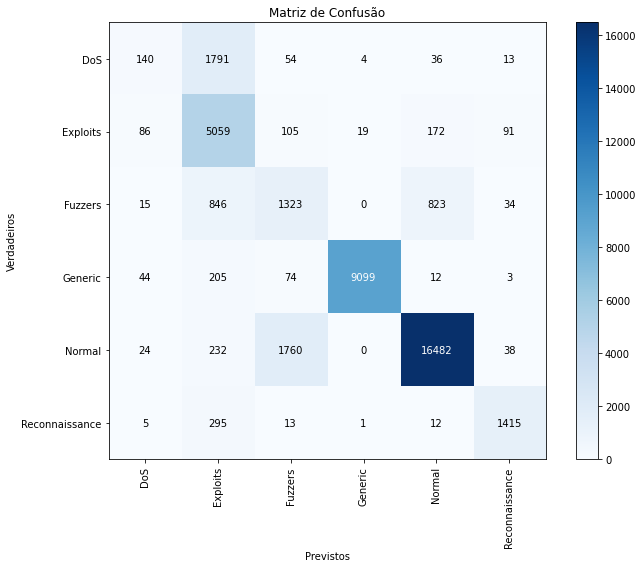

╒══════════════════╤════════════╤════════════════╤════════════╤═════════════╕
│ Tipo de Ataque   │   Precisão │   Recall / TPR │   F1-score │         FPR │
╞══════════════════╪════════════╪════════════════╪════════════╪═════════════╡
│ DoS              │   0.44586  │      0.0686948 │   0.119048 │ 0.00454462  │
├──────────────────┼────────────┼────────────────┼────────────┼─────────────┤
│ Exploits         │   0.600261 │      0.914497  │   0.724785 │ 0.0968298   │
├──────────────────┼────────────┼────────────────┼────────────┼─────────────┤
│ Fuzzers          │   0.397417 │      0.435054  │   0.415385 │ 0.0538032   │
├──────────────────┼────────────┼────────────────┼────────────┼─────────────┤
│ Generic          │   0.997369 │      0.964184  │   0.980496 │ 0.000777001 │
├──────────────────┼────────────┼────────────────┼────────────┼─────────────┤
│ Normal           │   0.939841 │      0.889189  │   0.913814 │ 0.0484189   │
├──────────────────┼────────────┼────────────────┼────────────┼─

In [5]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import metrics
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM, MaxPool1D, Conv1D
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.utils import to_categorical
from sklearn.preprocessing import LabelEncoder
from tabulate import tabulate
import copy

# Cópia profunda das variáveis: Constrói um novo objeto composto e então, recursivamente, insere nele cópias dos objetos encontrados no original. Fornece uma cópia completamente independente.
x_train_network = copy.deepcopy(x_train)
y_train_network = copy.deepcopy(y_train)
x_validation_network = copy.deepcopy(x_validation)
y_validation_network = copy.deepcopy(y_validation)
x_test_network = copy.deepcopy(x_test)
y_test_network = copy.deepcopy(y_test)

# Transformação das colunas alvo em numeros

# Vamos primeiro guardar
y_train_labels = copy.deepcopy(y_train_network)
y_validation_labels = copy.deepcopy(y_validation_network)
y_test_labels = copy.deepcopy(y_test_network)

# Criação do objeto codificador da coluna
label_encoder = LabelEncoder()

# Codificação
y_train_network_encoded = label_encoder.fit_transform(y_train_network.astype(str))
y_validation_network_encoded = label_encoder.transform(y_validation_network)
y_test_network_encoded = label_encoder.transform(y_test_network)

# Como estamos a usar categorical_crossentropy como a função loss e softmax como a função de ativação na camada de saída, precisamos de codificar a variavel alvo com one-hot encoding.
y_train_network = to_categorical(y_train_network_encoded)
y_validation_network = to_categorical(y_validation_network_encoded)
y_test_network = to_categorical(y_test_network_encoded)

# Definir o modelo

# Cria uma nova instância de um modelo sequencial. O modelo sequencial é uma pilha linear de camadas.
# As camadas densas representam uma camada totalmente conectada numa rede neural. A primeira possui 64 neurônios e utiliza a função de ativação ReLU. 
# O parâmetro input_dim é definido como o número de colunas nos dados x_train_ffnn.
# A primeira camada é uma camada convolucional 1D com 32 filtros e um tamanho de janela (kernel) de 9. 
# A função de ativação 'relu' é aplicada a essa camada. O parâmetro padding='same' garante que o tamanho da saída seja o mesmo que a entrada.
# Camada de pooling que reduz a dimensão espacial da saída pela metade, usando uma janela de tamanho 2
# Uma camada LSTM com 128 neurónios é adicionada associada com um dropout de 0,2
# A camada densa final é adicionada ao modelo. O número de neurónios nesta camada é determinado pelo número de classes nos dados y_train_dnn (número de ataques). 
# A função de ativação utilizada é softmax, que converte a saída de cada nó entre 0 e 1, representando a probabilidade prevista de pertencer a cada classe.
model_cnn = Sequential()
model_cnn.add(Conv1D(filters = 32, kernel_size = 9, padding = 'same', activation = 'relu', input_shape=(x_train_network.shape[1],1)))
model_cnn.add(MaxPool1D(pool_size = 2))
model_cnn.add(LSTM(units=128, return_sequences=False, dropout = 0.2))
model_cnn.add(Dense(units=y_train_network.shape[1], activation='sigmoid'))

# Compilar o modelo

# Esta linha compila o modelo. O otimizador é definido como 'adam', que é um algoritmo de otimização eficiente usado em aprendizagem profunda. 
# A função de perda é definida como 'categorical_crossentropy', que é adequada para problemas de classificação categóricos, como é o caso. 
# O parâmetro metrics especifica que o modelo deve calcular e relatar a exatidão durante o treino.
model_cnn.compile(optimizer='adam',
                   loss='categorical_crossentropy',       
                   metrics=['accuracy'])

# Treinar o modelo

# Esta linha treina o modelo usando os dados de treino (x_train_ffnn e y_train_ffnn). 
# O parâmetro epochs determina o número de vezes que os dados de treino são passados pelo modelo. 
# O parâmetro batch_size especifica o número de amostras por atualização de gradiente. 
# O parâmetro validation_data fornece os dados de validação para avaliar o desempenho do modelo em dados que ele não viu durante o treino. 
# O parâmetro callbacks permite especificar funções adicionais a serem chamadas durante o treino, como a paragem antecipada
# (técnica usada durante o treino do modelo para evitar o overfitting e encontrar o ponto ideal onde o desempenho do modelo num conjunto de dados de validação começa a ser exagerado).
# O parâmetro de patience é definido como 30, o que significa que se a perda de validação não melhorar em 30 épocas consecutivas, o treino será interrompido antecipadamente.
# O parâmetro verbose determina o nível de detalhe da saída de treino.

monitor = EarlyStopping(monitor='val_loss', min_delta=1e-3, 
                        patience=5, verbose=1, mode='auto',
                        restore_best_weights=True)


history = model_cnn.fit(x_train_network, y_train_network,
                         epochs=100,
                         batch_size=256,
                         validation_data=(x_validation_network, y_validation_network),
                         callbacks=[EarlyStopping(monitor='val_loss', patience=30, restore_best_weights=True)],
                         verbose=2)

# Gráfico dos valores de loss nas várias épocas durante o treino, para os dados de treino e validação
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Loss dados de treino')
plt.plot(history.history['val_loss'], label='Loss dados de validação')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
# Gráfico dos valores de exatidão nas várias épocas durante o treino, para os dados de treino e validação
plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Exatidão dados de treino')
plt.plot(history.history['val_accuracy'], label='Exatidão dados de validação')
plt.xlabel('Epoch')
plt.ylabel('Exatidão')
plt.legend()
plt.tight_layout()
plt.show()

# Avaliar o modelo com dados de teste
y_pred = model_cnn.predict(x_test_network)

# Cálculo das métricas
print('MÉTRICAS NOS DADOS DE TESTE: ')

auc_score = metrics.roc_auc_score(y_test_network, y_pred, multi_class='ovr')
f1_score = metrics.f1_score(y_test_network.argmax(axis=1), y_pred.argmax(axis=1), average='weighted')
accuracy = metrics.accuracy_score(y_test_network.argmax(axis=1), y_pred.argmax(axis=1))
cm = metrics.confusion_matrix(y_test_network.argmax(axis=1), y_pred.argmax(axis=1))

# Gráfico da matriz de confusão

# Obtém os nomes das categorias originais
attack_categories = label_encoder.inverse_transform(range(len(label_encoder.classes_)))
# Define o tamanho da figura
plt.figure(figsize=(10, 8))
# Gráfico da matriz de confusão
plt.imshow(cm, cmap='Blues')
plt.colorbar()
tick_marks = np.arange(len(label_encoder.classes_))
plt.xticks(tick_marks, attack_categories, rotation=90)
plt.yticks(tick_marks, attack_categories)
plt.xlabel('Previstos')
plt.ylabel('Verdadeiros')
plt.title('Matriz de Confusão')
# Adiciona as anotações dos valores na matriz de confusão
thresh = cm.max() / 2.
for i in range(cm.shape[0]):
    for j in range(cm.shape[1]):
        plt.text(j, i, format(cm[i, j], 'd'),
                 ha="center", va="center",
                 color="white" if cm[i, j] > thresh else "black")
plt.tight_layout()
plt.show()

# Tabela das métricas
# Cálculo da FPR (False Positive Rate) para cada tipo de ataque
fpr_scores = []
for i in range(len(cm)):
    tn, fp, fn, tp = metrics.confusion_matrix((y_test_network.argmax(axis=1) == i).astype(int), (y_pred.argmax(axis=1) == i).astype(int)).ravel()
    fpr = fp / (fp + tn)
    fpr_scores.append(fpr)
# Tabela das métricas
# Cálculo do classification report
classification_rep = metrics.classification_report(y_test_network.argmax(axis=1), y_pred.argmax(axis=1), output_dict=True)
# Extrair as métricas e o suporte do classification report
metrics_data = []
attack_mapping = dict(zip(range(len(attack_categories)), attack_categories))
for label, metrics_dict in classification_rep.items():
    if label.isdigit(): 
        metrics_list = [attack_mapping[int(label)]]
        metrics_list.extend([metrics_dict[key] for key in ('precision', 'recall', 'f1-score')])
        metrics_list.append(fpr_scores[int(label)])  # Adicionar a taxa de falsos positivos (FPR) calculada acima
        metrics_data.append(metrics_list)
# Definir os cabeçalhos da tabela
headers = ['Tipo de Ataque', 'Precisão', 'Recall / TPR', 'F1-score', 'FPR']
# Imprimir a tabela formatada
print(tabulate(metrics_data, headers=headers, tablefmt='fancy_grid'))

print('Métricas globias dos dados de teste: ')
# Impressão das métricas
print('AUC score:', auc_score)
print('Exatidão:', accuracy)

--------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------